# Group-12 Car Price Prediction
## V.V.S.N.SAI MOHAN (20275)
## M.VISHAL REDDY(20248)
## K.NAVEEN (20238)
## B.JAGADA (20217)
### (1st dataset)

> ## 1) Problem Definition

**In this Project,Developing a model which predicts the price of a used cars with different variables.Some car buyers will suffer a lot of problems like dealer may charge amount more than the car value.
This model can help them to predict the actual and reasonable price of those used cars.The data used in this project was downloaded from Kaggle.**

> ## 2 Datasets

**We are choosen 3 datasets for this project and each with different variables with different shapes.
In this 1st dataset, we are going to predict the Price of Used Cars using various features like Car_name, year, selling_price, present_price, Kms_driven, fuel_type, seller_type, transmission, owner etc.Here selling_price is target variable and others are independent variables.**

> ## 3) Prepare Data

> ## 4) Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

## Loading Data (1st dataset)

### * Data Summarization

In [2]:
df=pd.read_csv('data1.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### * Data Pre-Processing

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

> *No null values in raw data.*

In [7]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


*To check if there are any outliers*
> Here we conclude that we don't have any outliers as the values are gradually increasing!

#### * Drop features that are not required to build our model *

*In Car_Name column there are duplicate 'city' names and other names.*

*Better to remove that Car_Name attribute.*

In [8]:
df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]


* Adding Age column to find age and removing the year column for easy use.

In [9]:
df['Current_Year']=2022

In [10]:
df['Age']=df['Current_Year']-df['Year']
df.drop(['Current_Year'],axis=1,inplace=True)
df.drop(['Year'],axis=1,inplace=True)

In [11]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


### * Data Visualization

* Seller Type, Transmission nd Fuel Type Visualization with target variable

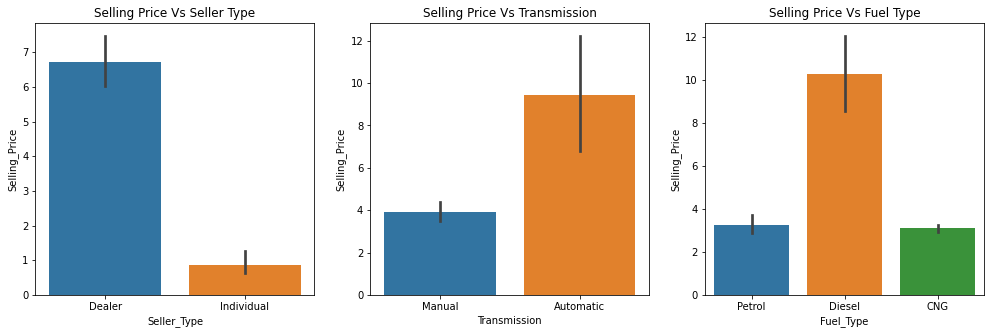

In [12]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sb.barplot(x='Seller_Type',y='Selling_Price',data=df)
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sb.barplot(x='Transmission',y='Selling_Price',data=df)
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sb.barplot(x='Fuel_Type',y='Selling_Price',data=df)
plt.title('Selling Price Vs Fuel Type')

plt.show()

* Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals *
* It can be observed that Selling Price would be higher for cars that are Automatic. *
* Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG *

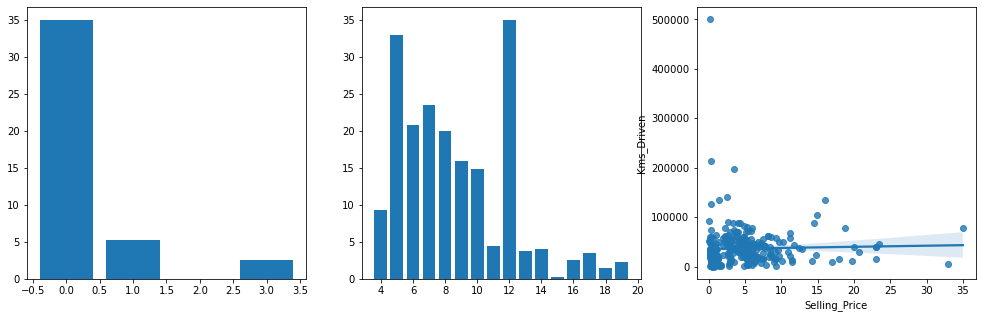

In [13]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
plt.bar(df['Owner'],df['Selling_Price'])

plt.subplot(1,3,2)
plt.bar(df['Age'],df['Selling_Price'])

plt.subplot(1,3,3)
#plt.scatter(df['Selling_Price'],df['Kms_Driven'])
sb.regplot(x='Selling_Price',y='Kms_Driven',data=df)
plt.show()

* Selling Price is high with less Owners used Cars *
* Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old *
* Lesser the Kms driven higher the Selling Price * 

C:\Users\91938\AppData\Local\Temp\ipykernel_17464\2693874398.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(df['Selling_Price']))
C:\Users\91938\AppData\Local\Temp\ipykernel_17464\2693874398.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(df['Kms_Driven']))


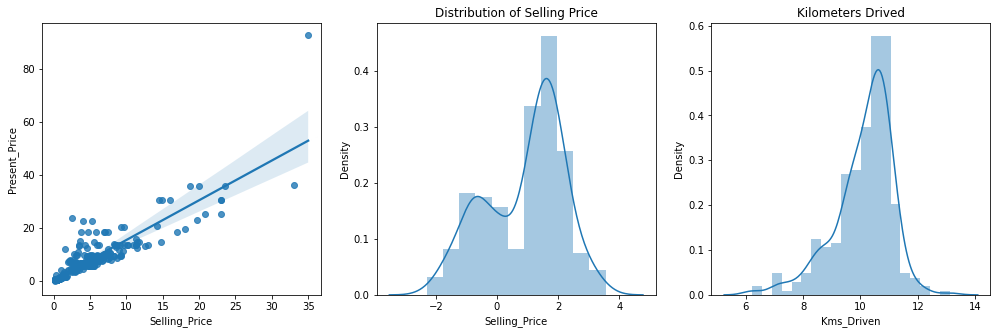

In [14]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sb.regplot(x='Selling_Price',y='Present_Price',data=df)

plt.subplot(1,3,2)
sb.distplot(np.log(df['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sb.distplot(np.log(df['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

*Selling Price tends to increase with increase in the Present Price of cars.*

* Lets see what all there in categorical values

In [15]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


* Dealing With Categorical Variables, creating dummie

In [16]:
clean_data = pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [17]:
clean_data.to_csv('cleandata1.csv',index=False)

> ## 5) Learning Algorithms

# Checking Multicollinearity Using VIF

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Kms_Driven','Owner','Age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.207249,Present_Price
1,2.891695,Kms_Driven
2,1.087333,Owner
3,13.391404,Age
4,5.118179,Fuel_Type_Diesel
5,15.542434,Fuel_Type_Petrol
6,2.231259,Seller_Type_Individual
7,8.416291,Transmission_Manual


* Age and fuel_type_petrol feature has high VIF
* Better to remove any one of them.
* Along with that I'm removing kms_driven becuase it also effects VIF

In [19]:
data_no_multicolinearity = clean_data.drop(['Kms_Driven','Fuel_Type_Petrol'],axis=1)

* cheking again after removing some correlated feature

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Age','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.625532,Present_Price
1,1.080716,Owner
2,6.528614,Age
3,1.656303,Fuel_Type_Diesel
4,1.929355,Seller_Type_Individual
5,4.776518,Transmission_Manual


> Now its look good, We have VIF < 5 and hence there is no Multicollinearity occurrence in our model.

# Feature Selection

> Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

> correlation heat map

<AxesSubplot:>

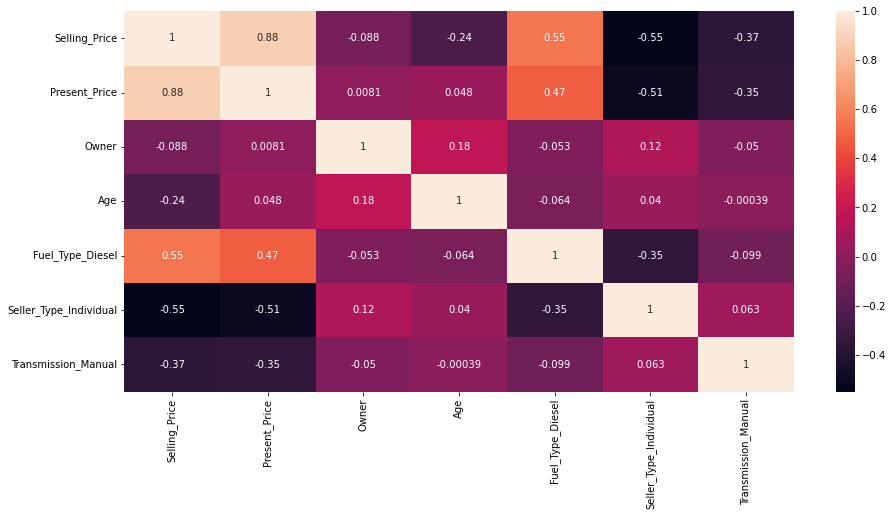

In [21]:
plt.figure(figsize=[15,7])
sb.heatmap(data_no_multicolinearity.corr(), annot=True)

***P-Value*** - P values are one of the best ways to determine if a variable is redundant(usefull or not) but they provide no information. 

If a variable has a p-values >0.05, we can disregard it.

In [22]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3)

array([0.   , 0.126, 0.   , 0.   , 0.   , 0.   ])

In [23]:
model_summry = pd.DataFrame(data=['Present_Price', 'Owner', 'Car_age', 'Fuel_Type_Diesel',
                              'Seller_Type_Individual', 'Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.126
2,Car_age,0.000
3,Fuel_Type_Diesel,0.000
4,Seller_Type_Individual,0.000


> * "Owner" feature which has p-value>0.05 resulting in insigificant. It means that Owner variable is not effecting that much in target variable

**Feature Importance**

*Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.*

In [24]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

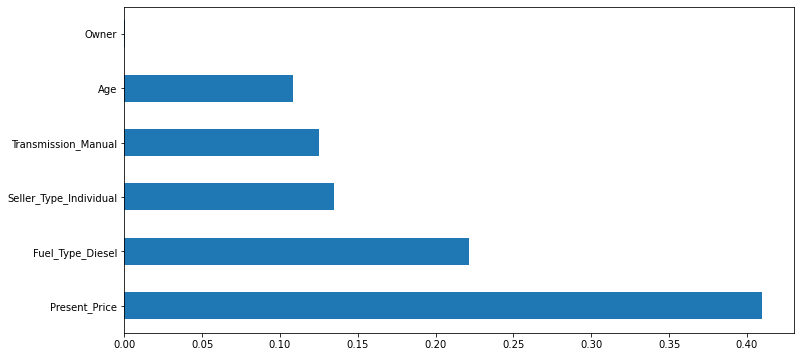

In [25]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [26]:
print(feat_importances.sort_values(ascending=False))

Present_Price             0.409659
Fuel_Type_Diesel          0.221610
Seller_Type_Individual    0.134519
Transmission_Manual       0.125147
Age                       0.108510
Owner                     0.000555
dtype: float64


In [27]:
data_no_multicolinearity.columns

Index(['Selling_Price', 'Present_Price', 'Owner', 'Age', 'Fuel_Type_Diesel',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

> Removing Owner attribute

In [28]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

## The FINAL dataset for model

In [29]:
final_df.head()

,Selling_Price,Present_Price,Age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,8,0,0,1
1,4.75,9.54,9,1,0,1
2,7.25,9.85,5,0,0,1
3,2.85,4.15,11,0,0,1
4,4.60,6.87,8,1,0,1


# Model Development

### Declaring dependent and independent variable

In [30]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Age']])

StandardScaler()

In [32]:
input_scaled = scaler.transform(X[['Present_Price','Age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Age'])

In [33]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Age'],axis=1))

### Training and Testing Data

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))

print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8407655400238148
RMSE : 2.6770088257637465


# Random Forest Regressor Model

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))

print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9235954437353538
RMSE : 1.854346556844567


# GBT Regressor Model

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()
gbt.fit(x_train,y_train)
y_pred_gbt = gbt.predict(x_test)
r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))

print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8897432451079934
RMSE : 2.2275829049719276


***So as we try diferent Regression Alorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.***

# Hyperparameter optimization using RandomizedSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
# Random search of parameters, using 5 fold cross validation.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [40]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [42]:
predictions=rf_random.predict(x_test)

In [43]:
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8083099631164241
RMSE : 2.937183256224674


# Test the model by giving input

In [44]:
def prediction(PresentPrice, CarAge, FuelType,SellerType, Transmissionmanual):
    scaled_value = scaler.transform([[float(PresentPrice), int(CarAge)]])
    price = scaled_value[0,0]
    age = scaled_value[0,1]
    fuel = int(FuelType)
    Seller = int(SellerType)
    trans = int(Transmissionmanual)
    
    return rf_random.predict([[price, age, fuel, Seller, trans]])

In [45]:
prediction(25, 14, 0, 2, 0)

C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.86201833])

In [46]:
prediction(23.73, 14, 0, 1,0)

C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\91938\Documents\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.68528333])

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)

ValueError: continuous is not supported

In [ ]:
df_cm = cm
sns.heatmap(df_cm,annot=True,cmap="Blues" ,annot_kws={"size": 20})
plt.title('Confusion Matrix')

# Conclusions:

* Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
* Car age is effecting negatively as older the car lesser the Selling Price.
* Selling Price of cars with Fuel type Diesel is higher.
* Car of Manual type is of less priced whereas of Automatic type is high.
* Cars sold by Individual tend to get less Selling Price when sold by Dealers.